## Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.<br>
Based on these features, you have to predict if an arbitrary passenger on Titanic would survivethe sinking or not.

## Dataset Link

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From above we can see that there are 7 columns with numeric data, and  5 columns with alphanumeric data.
Nominal data - name, ticket
Age - nominal

### Exploratory Data Analysis

In [3]:
# Getting dimensions od the dataset
df.shape

(891, 12)

The dataset consists of 891 rows and 12 columns, out of which 11 are independent variables and 1 is the dependent or target variable.

In [4]:
# Getting the column names
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

The independent variables are:<br>
- PassengerId
- Pclass
- Name
- Sex
- Age
- SibSp 
- Parch
- Ticket
- Fare
- Cabin
- Embarked<br>

The target variable is:<br>
- Survived:  Indicates whether the person survived (1) or not (0)

In [5]:
# Checking datatype of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Name, Sex, Ticket, Cabin and Embarked have object data type as they have string values.<br>
PassengerId, Survived, Pclass, Name, SibSp, and Parch have int64 data type as they have integer values.<br>
Age and Fare have float64 data type as they store float values.

In [6]:
# Checking for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are 177 missing values for age, 687 missing values for cabin and 2 missing values for embarked. We need to handle each missing value differently.
- Age: We can impute the missing values using the mean or median
- Cabin: Since more than 75% of the data is missing and the data is nominal, we can drop the column.
- Embarked: We can impute the missing values with tthe most frequently occurring value as it is categorical data, or we can drop the 2 rows.<br>

These issues will be handled befoe building the model in the pre-processing stage.

In [7]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above, we can see that Age, Cabin and Embarked have missing values as seen before. The overview of the dataset can be observed here.

In [9]:
# Number of unique values for each variable
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- From this it is clear that Survived (target variable), Pclass, Sex and Embarked are categorical variables.<br>
- SipSp and Parch are numeric and discrete variables.<br>
- Although passengerId and Name have 891 unique values they are nominal variables, which do not have any quantitative value. 

In [10]:
# Frequency of occurence of each value in 'Survived' column
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can observe that more people died, than survived. So there is a slight class imbalance.

#### Dataset description

In [11]:
# Statistical summary of columns (numerical data)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations from the statistical summary:
- PassengerId does not have any quantitative value, so the mean and median are irrelevant although they are equal.
- The mean and median are not same for Survived and Pclass. Since these are categorical variables, it is expected that one class might be more represented in the dataset.
- For Age and Fare, the mean is greater than the median. Hence the data in these variables are skewed to the right.
- SibSp and Parch are discrete variables. So the mean is not equal to the median. The median is 0 for both the variables.

#### Data Visualisation

In [12]:
sns.set_palette(sns.color_palette("hls"))

0    549
1    342
Name: Survived, dtype: int64


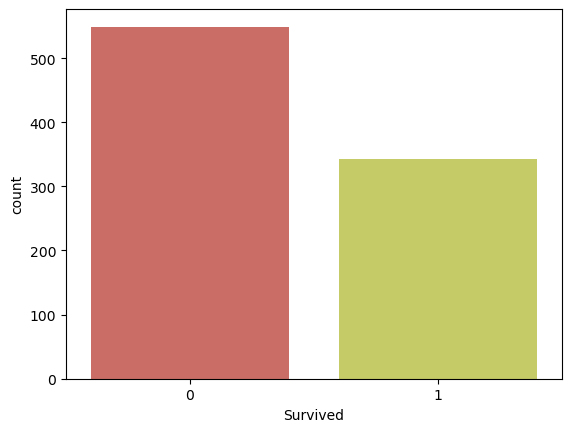

In [13]:
# Visualising the 'Survived' column
print(df.Survived.value_counts())
sns.countplot(x=df.Survived)
plt.show()

There are more people who died than survived, in the dataset.

3    491
1    216
2    184
Name: Pclass, dtype: int64


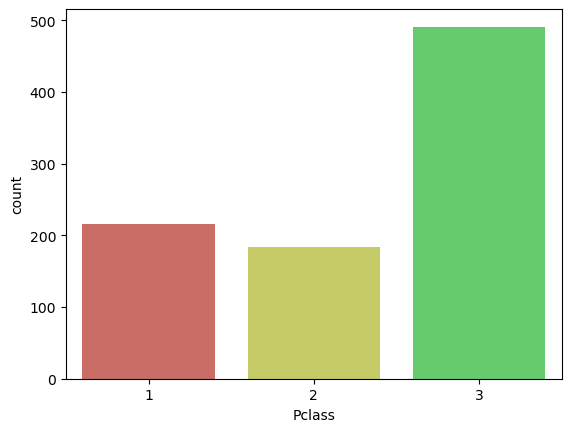

In [14]:
# Visualising the 'Pclass' column
print(df.Pclass.value_counts())
sns.countplot(x=df.Pclass)
plt.show()

Majority of the people were traveling in 3rd class.

male      577
female    314
Name: Sex, dtype: int64


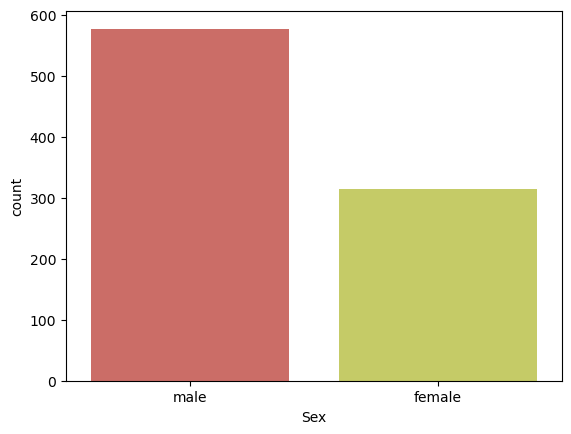

In [15]:
# Visualising the 'Sex' column
print(df.Sex.value_counts())
sns.countplot(x=df.Sex)
plt.show()

There were more males than females on the ship.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


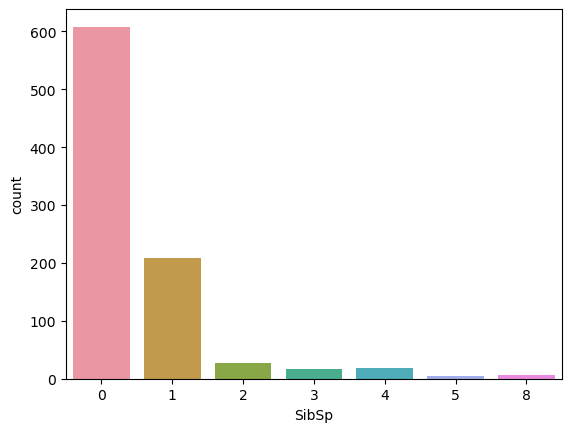

In [16]:
# Visualising the 'SibSp' column
print(df.SibSp.value_counts())
sns.countplot(x=df.SibSp)
plt.show()

Most of the passengers were travelling without Sibling or Spouse.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


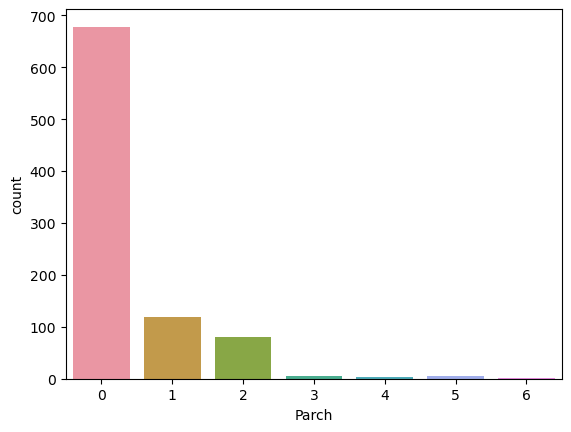

In [17]:
# Visualising the 'Parch' column
print(df.Parch.value_counts())
sns.countplot(x=df.Parch)
plt.show()

Majority of the passengers were traveling without parent or children

S    644
C    168
Q     77
Name: Embarked, dtype: int64


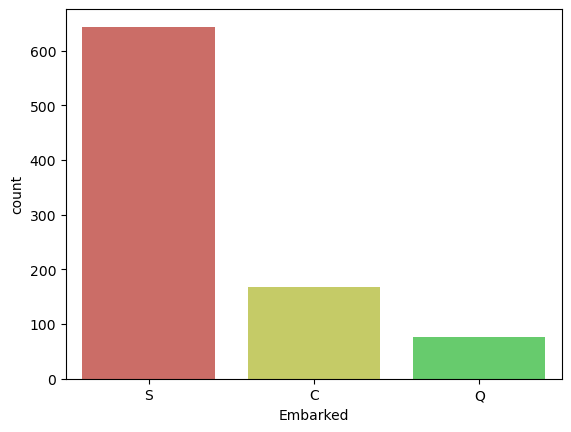

In [18]:
# Visualising the 'Embarked' column
print(df.Embarked.value_counts())
sns.countplot(x=df.Embarked)
plt.show()

Most of the assengers on the ship embarked from S.

In [19]:
num_cols = df[['Age', 'Fare']]
num_cols.columns

Index(['Age', 'Fare'], dtype='object')

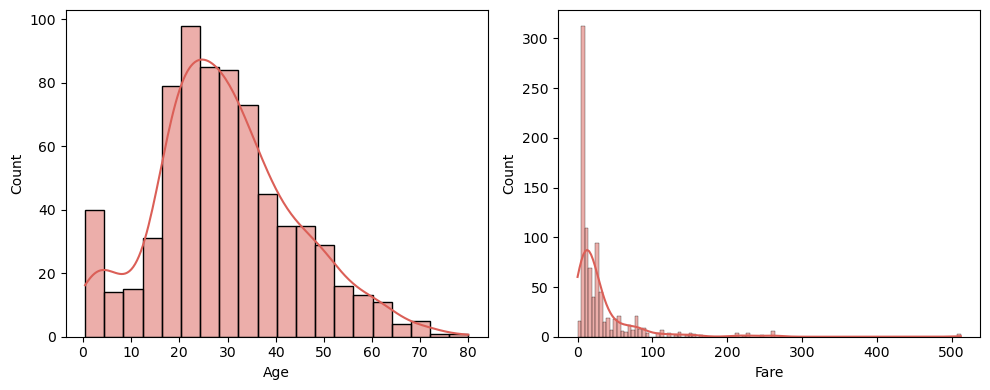

In [20]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 4))
plot_num = 1
for col in num_cols:
    if plot_num <= 2:
        ax = plt.subplot(1, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The Age variable is slightly skewed to the right and the Fare variable is almost completely skewed to the right.

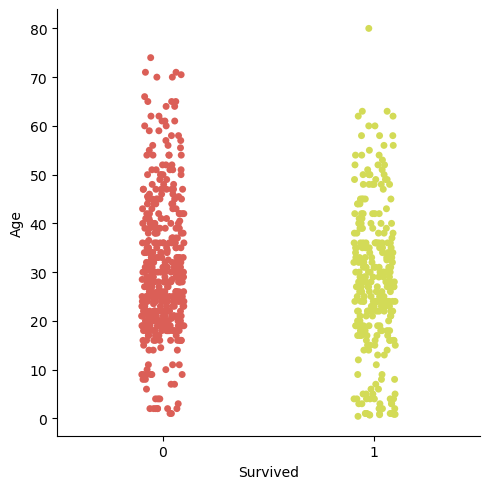

In [21]:
# Comparison between Age and Survived
sns.catplot(x='Survived', y='Age', hue='Survived', data=df)
plt.show()

There are fewer people wo survived than the people who died. This plot shows that people from age late 60s to late 70s did not survive.

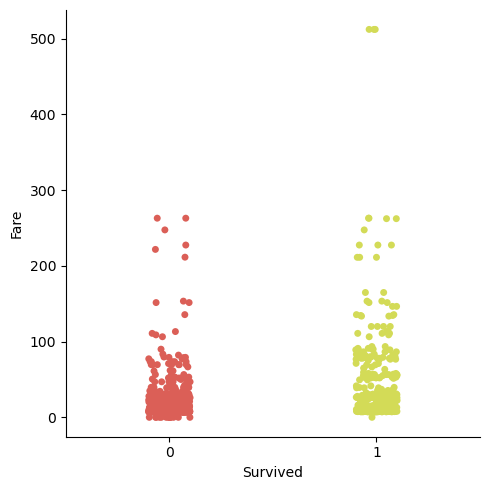

In [22]:
# Comparison between Fare and Survived
sns.catplot(x='Survived', y='Fare', hue='Survived', data=df)
plt.show()

The plot shows that more people who paid higher fare survived.

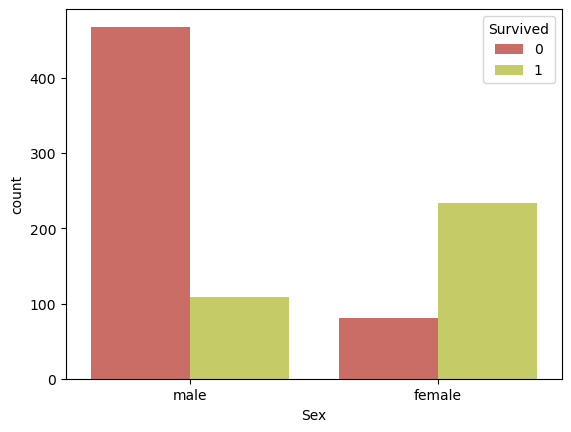

In [23]:
# Survival count by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

There were more female survivers than male. The proportion of females that survived was a lot higher than the proportion of men that survived.

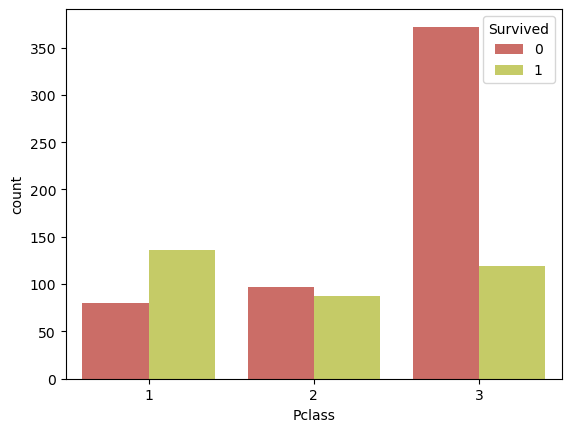

In [24]:
# Survival count by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

More people from first class survived than second and third classes.

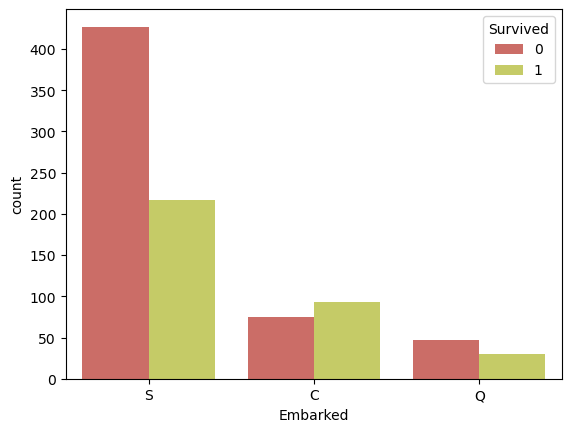

In [25]:
# Survival count by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()

More people who embarked from S survived, than who embarked from C or Q.

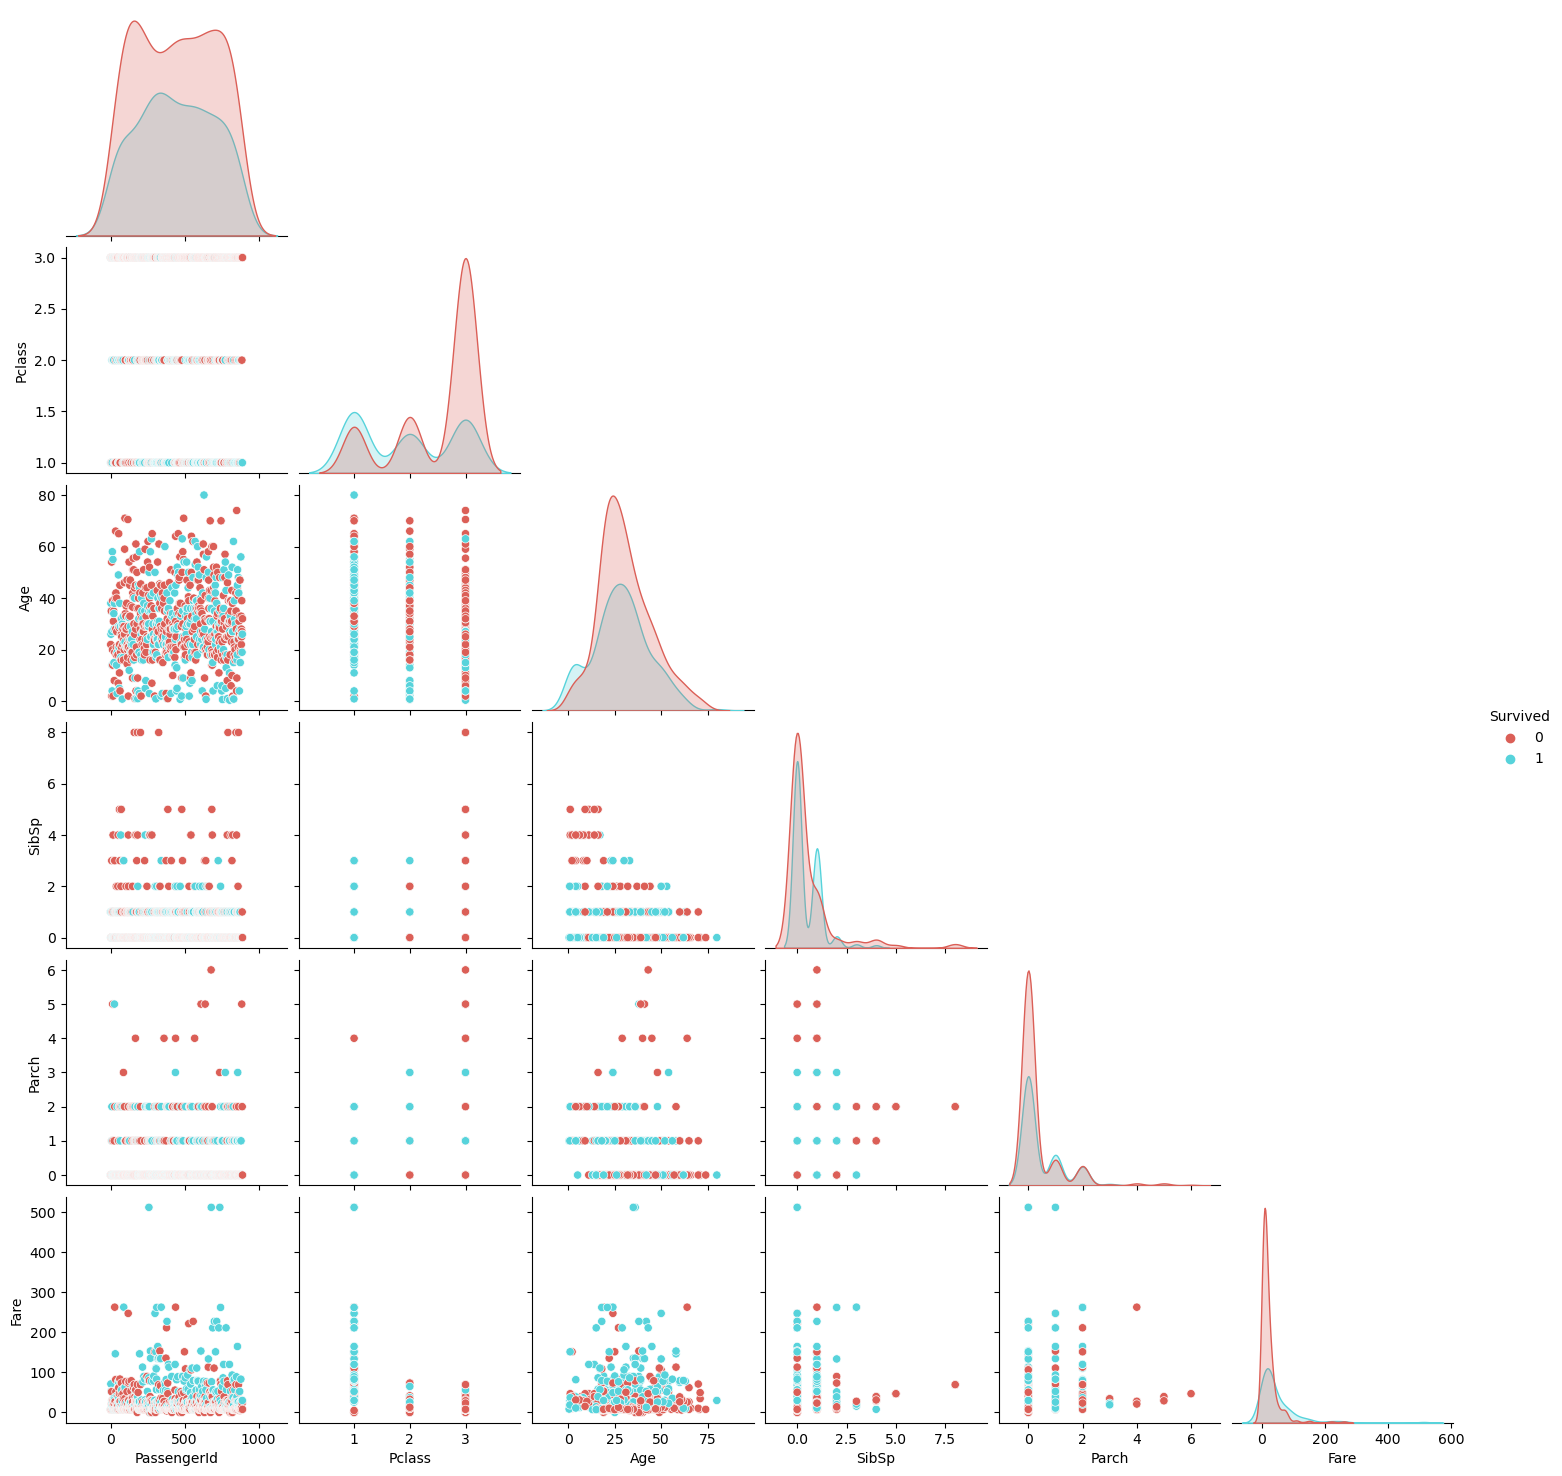

In [26]:
# Pairwise relation between variables with respect to the Survived
sns.pairplot(df, hue='Survived', palette='hls', corner = True)
plt.show()

Observations from the pairplot:
- There seems to be weak relationships between the independent variables and the target variable (Survived).
- People of almost all ages survived, but the survival count was low.
- It also seems that more people who paid higher fare or traveled in first class, survived than the rest.

### Data Preprocessing

In [27]:
# Imputing the mean value for Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [28]:
# Imputing the mode value (highest frequency) for Embarked column
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [29]:
# Dropping unnecessary columns
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [30]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


The missing values have been imputed and the unnecessary columns have been dropped.

### Checking for outliers

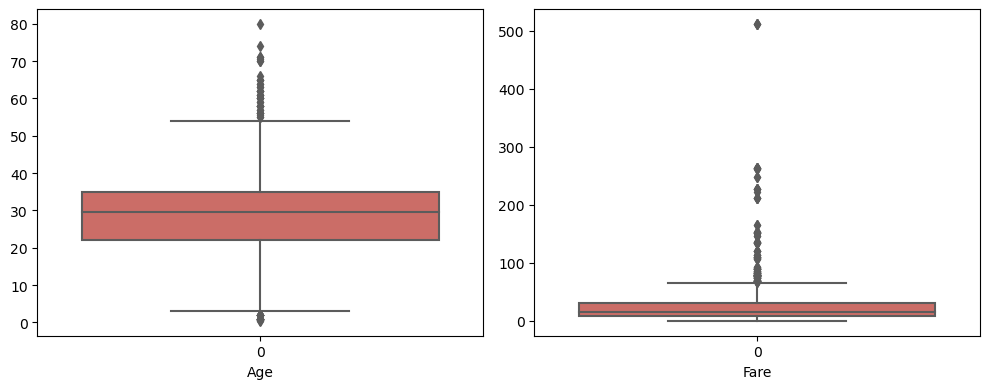

In [32]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 4))
plot_num = 1
for col in num_cols:
    if plot_num <= 2:
        ax = plt.subplot(1, 2, plot_num)
        sns.boxplot(df[col], palette='hls')
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There seem to be quite a few outlers in Age and Fare columns.<br>
The values for age and fare are still plausible values. They are both non-negative and well within the possible range of values. So we can proceed without removing outliers.

### Checking for skewness

In [33]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Since Pclass, SibSp and Parch are discrete variables, we do not need to remove their skewness or normalise them. So, we will only remove skewness from Fare.

In [34]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [35]:
# Removing skewness

transformed_log = np.log(df['Fare'])                        # Log Transformation
transformed_boxcox = special.boxcox1p(df['Fare'], 0.15)     # Box-Cox Transformation with lambda=0.15
transformed_inverse = 1 / df['Fare']                        # Inverse Transformation
transformed_yeojohnson, _ = stats.yeojohnson(df['Fare'])    # Yeo-Johnson Transformation
transformed_cbrt = np.cbrt(df['Fare'])                      # Cube Root Transformation

# Creating a dictionary for the skewness values of each transformation
transformed_skew = {
    "Log Transformation": stats.skew(transformed_log),
    "Box-Cox Transformation": stats.skew(transformed_boxcox),
    "Inverse Transformation": stats.skew(transformed_inverse),
    "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
    "Cube Root Transformation": stats.skew(transformed_cbrt)
}

transformed_skew

{'Log Transformation': nan,
 'Box-Cox Transformation': 0.9509361779115001,
 'Inverse Transformation': nan,
 'Yeo Johnson Transformation': -0.04026125673670591,
 'Cube Root Transformation': 1.2283098912413501}

The Yeo Johnson Transformation brings the skewness value withn acceptable range.

In [36]:
df['Fare'], _ = stats.yeojohnson(df['Fare'])

In [37]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare       -0.040329
dtype: float64

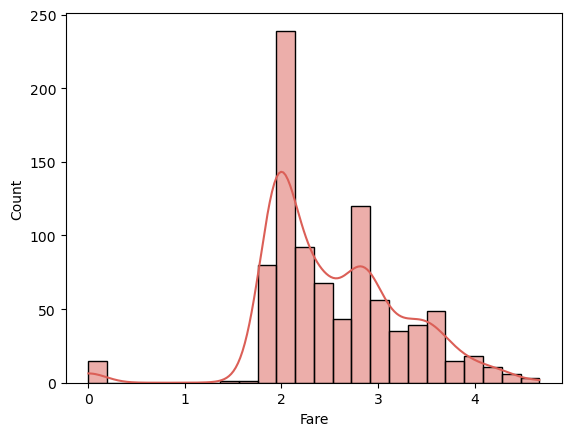

In [38]:
sns.histplot(df['Fare'], kde=True)
plt.show()

The fare has been normalised now and skewness has been reduced.

### Encoding categorical variables

In [39]:
# Using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()  

In [40]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,1.906724,2.0
1,1,1,0.0,38.0,1,0,3.497640,0.0
2,1,3,0.0,26.0,0,0,1.970459,2.0
3,1,1,0.0,35.0,1,0,3.304258,2.0
4,0,3,1.0,35.0,0,0,1.981680,2.0


The categorical variables have now been encoded to numerical variables.

### Correlation analysis

In [42]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.326914,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.638253,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.264282,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.096646,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.321629,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.332876,0.039798
Fare,0.326914,-0.638253,-0.264282,0.096646,0.321629,0.332876,1.000000,-0.195441
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.195441,1.000000


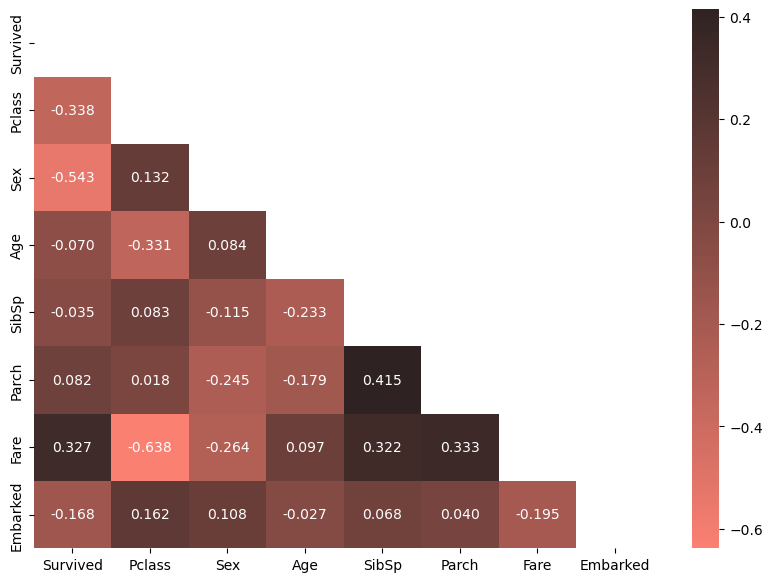

In [43]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 7))
palette = sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap=palette, mask=mask)
plt.show()

All the relationships are very weak.<br>
The strongest relationship is between Fare and Pclass, which are negatively correlated. This means first class has higher fares and third class lower fares.<br>
There is also a moderate correlation between Sex and Survived, as more women survived than men.

In [44]:
df.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.326914
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

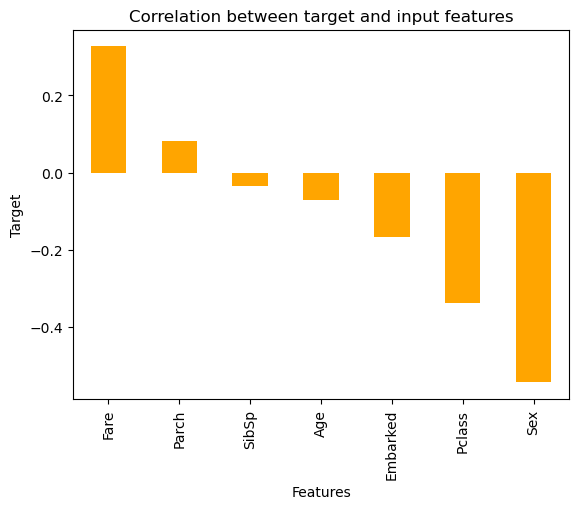

In [45]:
# Visualising the correlation between target and input features
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar', color='orange')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

Sex, Pclass and Fare have the highest correlation with the target variable, Survived.

### Separating features and target

In [46]:
x = df.drop('Survived', axis=1)
y = df['Survived']

#### Feature scaling

In [47]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.878820,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,1.336651,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.790065,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,1.067352,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.774439,0.585954


### Checking Variance Inflation Factor

In [48]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,Pclass,2.236176
1,Sex,1.124568
2,Age,1.204403
3,SibSp,1.459328
4,Parch,1.392806
5,Fare,2.577605
6,Embarked,1.074293


There is no multicollinearity in the dataset.

### Model building

#### Splitting data into train and test

In [49]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.8507462686567164
Random state for best accuracy: 35


In [51]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

In [52]:
y_train.value_counts()

0    384
1    239
Name: Survived, dtype: int64

There are less survivors compared to non-survivors, but the difference is not too high, so we do not need to balance the classes.

#### Classification models

In [53]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
0,Logistic Regression,0.850746
8,Gradient Boosting,0.835821
1,Support Vector Classifier,0.832090
7,AdaBoost,0.828358
10,CatBoost,0.828358
2,KNN,0.817164
5,Gaussian Naive Bayes,0.817164
4,Random Forest,0.798507
6,Extra Trees,0.787313
9,XGBoost,0.787313


Based on the above results, Logistic Regression performs the best on the test data.

#### Confusion matrices

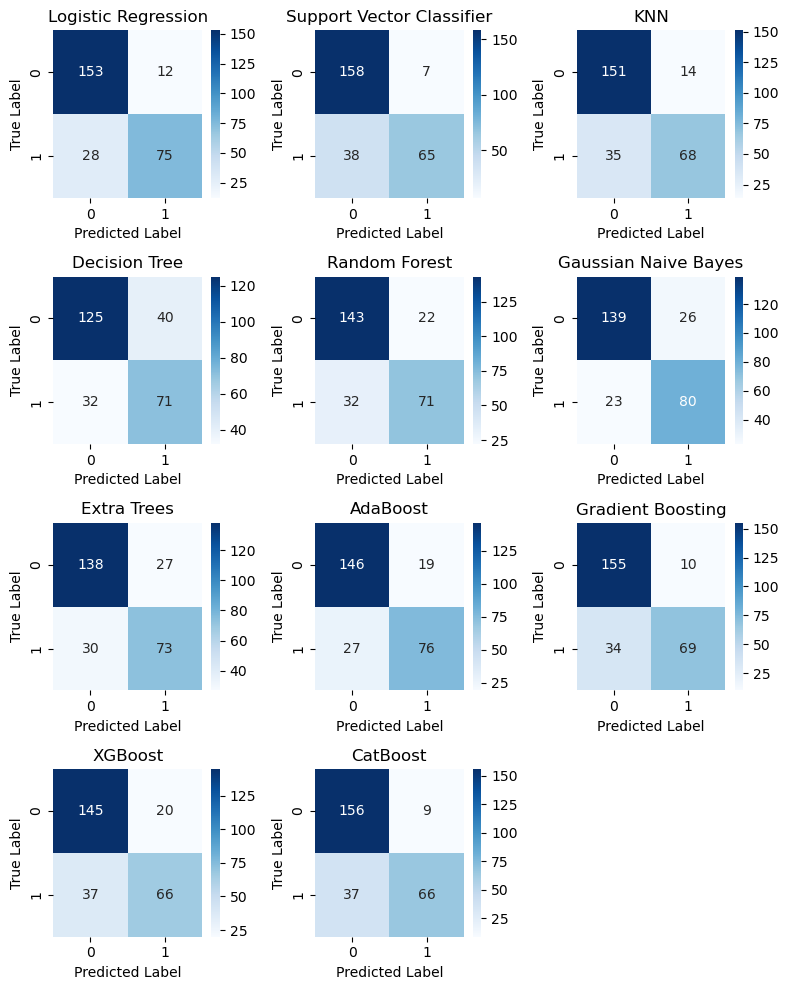

In [55]:
plt.figure(figsize=(8, 10))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(4, 3, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification Reports

In [56]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       165
           1       0.86      0.73      0.79       103

    accuracy                           0.85       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       165
           1       0.90      0.63      0.74       103

    accuracy                           0.83       268
   macro avg       0.85      0.79      0.81       268
weighted avg       0.84      0.83      0.82       268

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       165
           1       0.83      0.66      0.74       103

    accura

#### Using Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x_train, y_train, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
10,CatBoost,0.831613,0.828358,0.003255
1,Support Vector Classifier,0.825213,0.832090,0.006877
2,KNN,0.807561,0.817164,0.009603
6,Extra Trees,0.794684,0.805970,0.011286
9,XGBoost,0.802761,0.787313,0.015448
8,Gradient Boosting,0.820348,0.835821,0.015473
4,Random Forest,0.796310,0.813433,0.017123
3,Decision Tree,0.788271,0.738806,0.049465
7,AdaBoost,0.777097,0.828358,0.051261
5,Gaussian Naive Bayes,0.751368,0.817164,0.065796


As we can observe, CatBoost model is the least overfitting model as the difference between Cross validation Accuracy and Test accuracy is the least.

#### Hyperparameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2],
    'iterations': [10, 20, 50, 100, 200, 500]
}

In [61]:
gcv = GridSearchCV(catboost.CatBoostClassifier(verbose=0), params, cv=5, scoring='accuracy')
gcv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002649128EDC0>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 50, 100, 200, 500],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                           0.2]},
             scoring='accuracy')

In [62]:
best_params = gcv.best_params_
best_params

{'depth': 5, 'iterations': 200, 'learning_rate': 0.1}

In [64]:
model = catboost.CatBoostClassifier(verbose=0, **best_params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8097014925373134


The final accuracy of the model is 81%

#### Plotting ROC for the best model

In [65]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

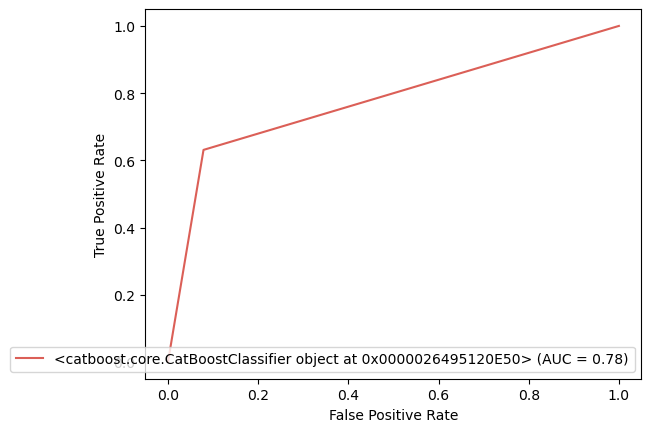

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
display.plot()

The AUC value for the model is 0.78

### Saving the model

In [67]:
import pickle

In [68]:
filename = 'final_titanic_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Predicting using the saved model

In [69]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [70]:
df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
df.head(20)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,1,1
8,1,0
9,1,1


These are the final predictions.